In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
import pandas as pd
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

sheep = np.load(r"data\full_numpy_bitmap_sheep.npy")
# print(sheep.shape)
giraffe = np.load(r"data\full_numpy_bitmap_giraffe.npy")
# print(giraffe.shape)

sheep = sheep[:1000]
giraffe = giraffe[:1000]
# Print the first 4 images in each data set.
# for i in range(4):  
#   plt.imshow(sheep[i].reshape((28,28)), cmap=plt.get_cmap('gray'))
#   plt.show()

# for i in range(4):
#   plt.imshow(giraffe[i].reshape((28,28)), cmap=plt.get_cmap('gray'))
#   plt.show()

In [ ]:
def combine_data_sets(*args):
  X = np.zeros((0,784))
  Y = np.zeros((0,1))
  for i in range(len(args)):
    X = np.concatenate((X, args[i]))
    Y = np.concatenate((Y, np.ones((args[i].shape[0],1))*i))
  # scramble the X and Y together (unnessesary bc we are using train_test_split to scramble the data)
  # p = np.random.permutation(X.shape[0])
  # X = X[p]
  # Y = Y[p]
  print(f"Total X shape: {X.shape}, Total Y shape: {Y.shape}")
  # turn Y into a (n,) array
  Y = Y.reshape(Y.shape[0])
  print(Y.shape)
  return X, Y
  
  
  

In [ ]:
# Split the dataset
X, y = combine_data_sets(sheep, giraffe)

# print 10 samples with their y value
# for i in range(10):
#     plt.imshow(X[i].reshape((28,28)), cmap=plt.get_cmap('gray'))
#     plt.show()
#     print(Y[i])

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10, shuffle=True)
# X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.2, random_state=10, shuffle=True)
# X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size = 0.2, random_state=10, shuffle=True)

print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
# print(f"X_val shape: {X_val.shape}, y_val shape: {y_val.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

Total X shape: (2000, 784), Total Y shape: (2000, 1)
(2000,)
X_train shape: (1600, 784), y_train shape: (1600,)
X_test shape: (400, 784), y_test shape: (400,)


In [ ]:
# Normalizing Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
# X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
#Import svm model
from sklearn import svm

def degree_test(kernel, degree, C):
  #Create a svm Classifier
  clf = svm.SVC(kernel=kernel, degree=degree, C=C) # Linear Kernel

  #Train the model using the training sets
  clf.fit(X_train, y_train)

  
  return clf

cls_list = {}
data = {"kernel": [], "degree": [], "C": [], "accuracy": []}
for kernel in ["linear", "poly", "rbf"]:
  for degree in range(1, 5):
    for C in [0.01, 0.05, 0.1, 1, 10]:
      data["kernel"].append(kernel)
      data["degree"].append(degree)
      data["C"].append(C)
      # calculate the accuracy for validation data
      classifier = degree_test(kernel, degree, C)
      y_pred = classifier.predict(X_test)
      accuracy = metrics.accuracy_score(y_test, y_pred)
      data["accuracy"].append(accuracy)
      # store classifier in dict for usage later
      cls_list[(kernel, degree, C)] = classifier

df = pd.DataFrame(data)
print(df)

    kernel  degree      C  accuracy
0   linear       1   0.01    0.9600
1   linear       1   0.05    0.9500
2   linear       1   0.10    0.9500
3   linear       1   1.00    0.9500
4   linear       1  10.00    0.9500
5   linear       2   0.01    0.9600
6   linear       2   0.05    0.9500
7   linear       2   0.10    0.9500
8   linear       2   1.00    0.9500
9   linear       2  10.00    0.9500
10  linear       3   0.01    0.9600
11  linear       3   0.05    0.9500
12  linear       3   0.10    0.9500
13  linear       3   1.00    0.9500
14  linear       3  10.00    0.9500
15  linear       4   0.01    0.9600
16  linear       4   0.05    0.9500
17  linear       4   0.10    0.9500
18  linear       4   1.00    0.9500
19  linear       4  10.00    0.9500
20    poly       1   0.01    0.9625
21    poly       1   0.05    0.9700
22    poly       1   0.10    0.9775
23    poly       1   1.00    0.9750
24    poly       1  10.00    0.9550
25    poly       2   0.01    0.4875
26    poly       2   0.05   

In [ ]:
# display some
# for i in range(10):
#     plt.imshow(X_test[i].reshape((28,28)), cmap=plt.get_cmap('gray'))
#     plt.show()
#     print(cls_list[2].predict(X_test[i].reshape(1,-1)))

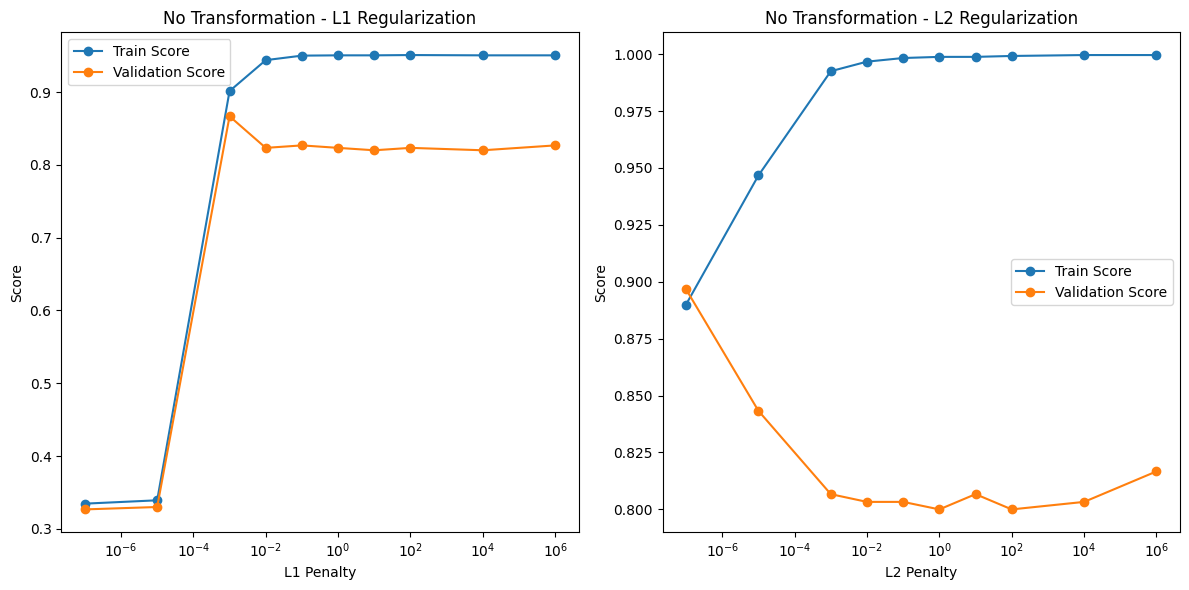